In [1]:
#!pip install -U scikit-image

# Getting started

scikit-image is an image processing Python package that works with numpy arrays. The package is imported as skimage:

In [ ]:
!pip install scikit-image

In [2]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

In [3]:
camera = ski.data.camera()


In [5]:
type(camera),camera.shape,

(numpy.ndarray, (512, 512))

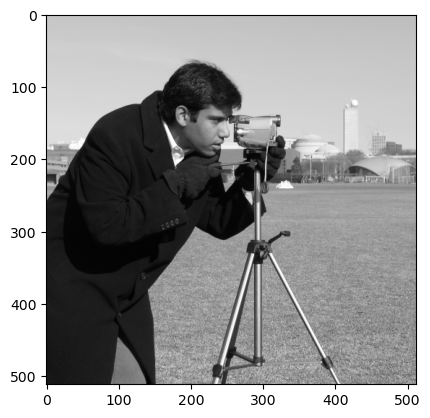

In [6]:
plt.imshow(camera,cmap='gray')

# Trata de poner una figura geometrica sin relleno en la imagen

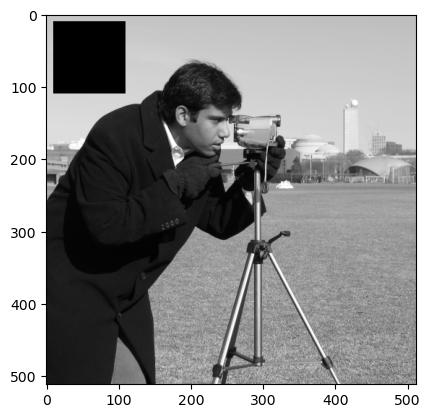

In [7]:
camera[10:110,10:110] = 0
plt.imshow(camera,cmap='gray')

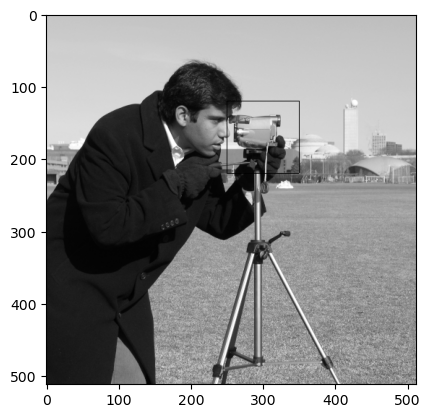

In [20]:
n = 100

def draw_square(img,xi,yi,n=100):
    image = img.copy()
    #xi,yi = 350,400
    for i in range(0,n):
        image[xi+i,yi] = 0
        image[xi,yi+i] = 0
        image[xi+i,yi+n] = 0
        image[xi+n,yi+i] = 0
    return image


camera = ski.data.camera()
camera = draw_square(camera,120,250)
#camera = draw_square(camera,120,250,200)
plt.imshow(camera,cmap='gray')

# Masking (indexing with masks of booleans):

In [25]:
camera < 87

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]], shape=(512, 512))

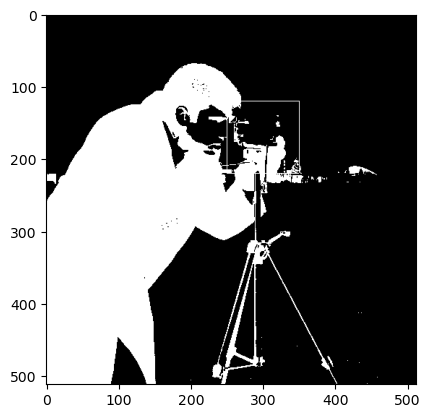

In [23]:
camera_tmp = camera.copy()

mask = camera < 87
camera_tmp[mask] = 255

plt.imshow(mask, cmap='gray')

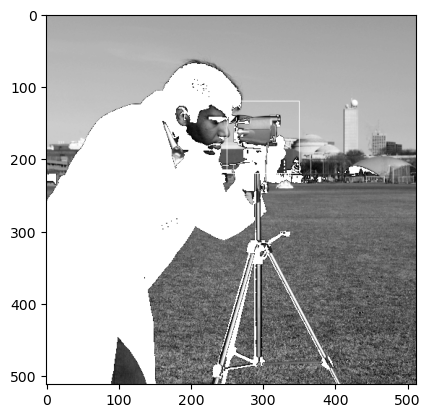

In [24]:
plt.imshow(camera_tmp, cmap='gray')

# Color images

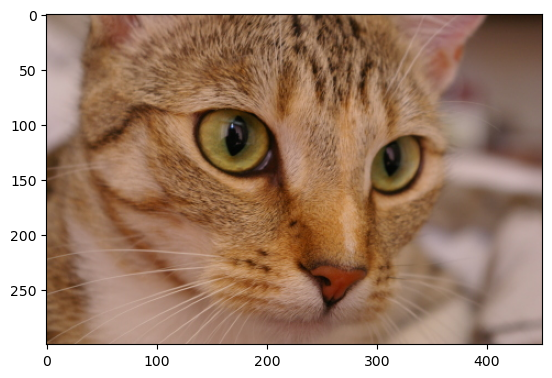

In [26]:
cat = ski.data.chelsea()


plt.imshow(cat)

In [27]:
cat[10,10]

array([157, 135, 122], dtype=uint8)

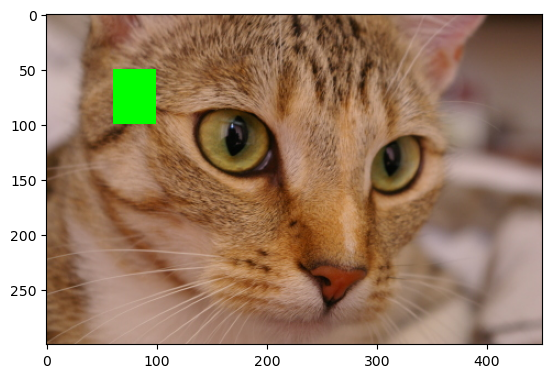

In [31]:
#cat[50, 60] = 0 # set the pixel at row 50, column 60 to black
cat[50:100, 61] = [0, 255, 0]  # [red, green, blue]
cat[50, 61:100] = [0, 255, 0]  # [red, green, blue]
cat[50:100, 61:100] = [0, 255, 0]  # [red, green, blue]
plt.imshow(cat)

# Projective transforms (homographies)

En procesamiento de imágenes, la transformación afín se utiliza para manipular imágenes de manera que se ajusten a ciertas necesidades, como corregir distorsiones, alinear imágenes, aplicar efectos de perspectiva, o mapear una imagen a una nueva forma. 

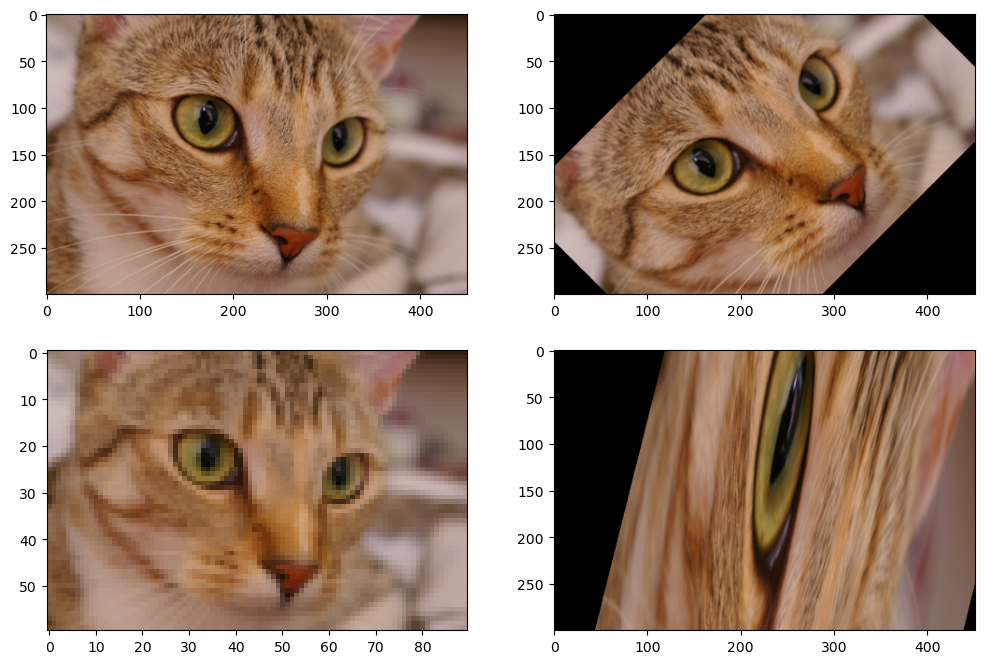

In [32]:
from skimage import transform

cat = ski.data.chelsea()


fig = plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(cat)

plt.subplot(222)
# Rotar la imagen 45 grados
rotated_image = transform.rotate(cat, angle=45)
plt.imshow(rotated_image)

plt.subplot(223)
# Escalar la imagen
scaled_image = transform.rescale(cat, scale=0.2,channel_axis= -1)
plt.imshow(scaled_image)

plt.subplot(224)
#define source and destination points:

src = np.array([[150, 150],
                [250, 100],
                [150, 200]])
dst = np.array([[200, 200],
                [300, 150],
                [150, 400]])
#Estimate the transformation matrix:
tform = ski.transform.AffineTransform()
tform.estimate(src, dst)
#Apply the transformation:
warped = ski.transform.warp(cat, inverse_map=tform.inverse)
plt.imshow(warped)

Tarea: 

Cambia la imagen del ejemplo anterior, y modifica los valores en 

- transform.rotate(cat, angle=45)
- transform.rescale(cat, scale=0.2,channel_axis= -1)
- ski.transform.AffineTransform()

# ProjectiveTransform

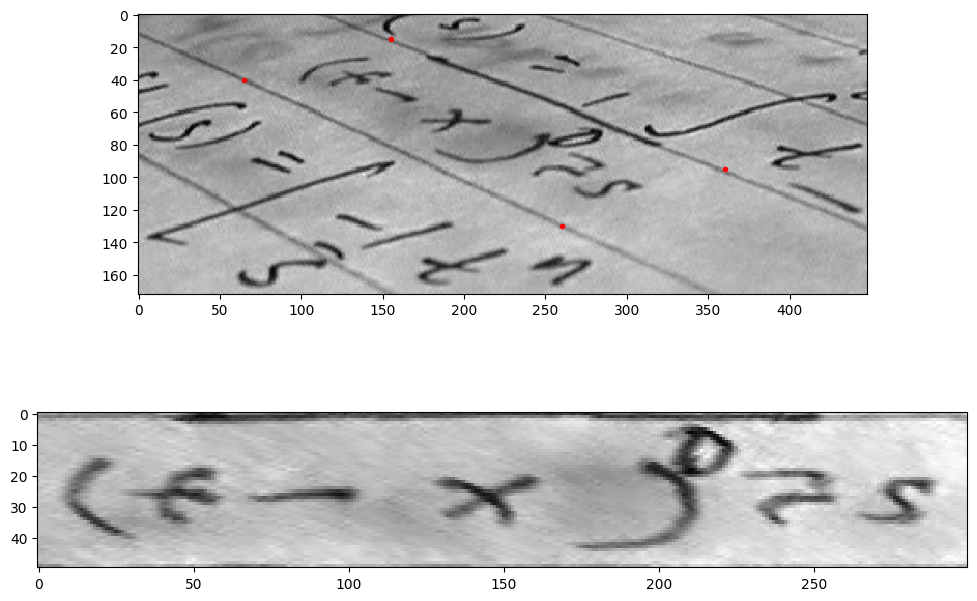

In [29]:
text = ski.data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = ski.transform.ProjectiveTransform()
tform3.estimate(src, dst)
warped = ski.transform.warp(text, tform3, output_shape=(50, 300))

fig = plt.figure(figsize=(12, 8))
fig.add_subplot(2, 1, 1)
plt.imshow(text, cmap='gray')
plt.plot(dst[:, 0], dst[:, 1], '.r')
fig.add_subplot(2, 1, 2)
plt.imshow(warped, cmap='gray')